# 3

In [1]:
import random
import numpy as np
import matplotlib.pyplot as plt

# Genetic Algorithm parameters
POPULATION_SIZE = 100
GENERATIONS = 300
CROSSOVER_RATE = 0.5  # Crossover rate
CROSSOVER_PROB = 0.7
MUTATION_RATE = 0.3
MUTATION_STEP = 2

# Data points
data = [
    (0, 0),
    (1.47, 0),
    (1, -6.33e-8),
    (0.75, -6.34e-8),
    (1.5, 5.65e-9),
    (0.2, -1.03e-8)
]

# Define the fitness function as Mean Squared Error (MSE)
def fitness_function(individual):
    a, b, c, d, e, f, g = individual
    squared_errors = []
    for x, y in data:
        predicted_y = (
            (a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g) / ((4.74e-4) * (3e10))
        )
        squared_errors.append((predicted_y - y) ** 2)
    mse = sum(squared_errors) / len(squared_errors)
    return -mse  # We maximize fitness, so we return the minus MSE

# Generate an initial population
def generate_population(size):
    population = []
    for _ in range(size):
        individual = [
            random.uniform(-5, 5),
            random.uniform(-5, 5),
            random.uniform(-5, 5),
            random.uniform(-5, 5),
            random.uniform(-5, 5),
            random.uniform(-5, 5),
            random.uniform(-5, 5)
        ]
        population.append(individual)
    return population

def crossover(parent1, parent2, crossover_rate=0.9, alpha=0.5):
    if random.random() > crossover_rate:
        return parent1, parent2

    crossover_point = random.randint(1, len(parent1) - 1)

    child1 = []
    child2 = []

    for i in range(len(parent1)):
        if i < crossover_point:
            child1.append(parent1[i])
            child2.append(parent2[i])
        else:
            child1_value = alpha * parent1[i] + (1 - alpha) * parent2[i]
            child2_value = alpha * parent2[i] + (1 - alpha) * parent1[i]
            child1.append(child1_value)
            child2.append(child2_value)

    return child1, child2

# Perform Gaussian mutation
def mutation(individual, mutation_rate=0.3, mutation_step=2):
    mutated_individual = []
    for gene in individual:
        if random.random() < mutation_rate:
            gene += random.gauss(0, mutation_step)
        mutated_individual.append(gene)
    return mutated_individual

# Select individuals for reproduction using roulette wheel selection
def selection(population):
    fitness_values = [fitness_function(individual) for individual in population]
    total_fitness = sum(fitness_values)
    probabilities = [fitness / total_fitness for fitness in fitness_values]
    cumulative_probabilities = [sum(probabilities[:i+1]) for i in range(len(probabilities))]

    selected = []
    for _ in range(len(population)):
        r = random.random()
        for i in range(len(population)):
            if r <= cumulative_probabilities[i]:
                selected.append(population[i])
                break
    return selected


In [2]:
import numpy as np
import matplotlib.pyplot as plt

GENERATIONS = 50
POPULATION_SIZE = 100
PROB_CROSSOVER = 0.7
alpha = 0.5 
PROB_MUTATION = 0.3
MUTATION_STEP = 2

# Define your selection, crossover, mutation, and fitness_function functions here

population = generate_population(POPULATION_SIZE)

for _ in range(GENERATIONS):
    # Select individuals for reproduction
    parents = selection(population)

    # Shuffle parents pool
    np.random.shuffle(parents)

    # Randomly pair solutions
    paired_parents = []
    num_parents = len(parents)
    for i in range(0, num_parents, 2):
        if i + 1 < num_parents:
            paired_parents.append([parents[i], parents[i + 1]])
        else:
            # If the number of parents is odd, handle the last parent separately
            paired_parents.append([parents[i]])

    offspring = []
    # Create new population through crossover and mutation
    for pair in paired_parents:
        parent1, parent2 = pair
        child1, child2 = crossover(parent1, parent2, PROB_CROSSOVER, alpha)
        offspring.append(mutation(child1, PROB_MUTATION, MUTATION_STEP))
        offspring.append(mutation(child2, PROB_MUTATION, MUTATION_STEP))

    # Combine the offspring and the population
    population += offspring

    # Calculate fitness values for the combined population
    fitness_values = [fitness_function(individual) for individual in population]

    # Sort the population based on fitness values
    population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

    # Keep the fittest individuals
    population = population[:POPULATION_SIZE]

    

# 3.a.

Best Solution: [0.0666898534438376, 0.25685844999402097, -0.9837816375144866, 2.3006726502229156, -2.0346324231662507, -0.5428775413252431, -0.00225561926032148]

Calculated expression:
                     6                        5                        4      
4.68986311138098e-9⋅x  + 1.80631821374136e-8⋅x  - 6.91829562246474e-8⋅x  + 1.6

                  3                        2                                  
1791325613426e-7⋅x  - 1.43082448886516e-7⋅x  - 3.81770422872885e-8⋅x - 1.58623

             
014087305e-10

Best Fitness Ever: -9.306818516223356e-18


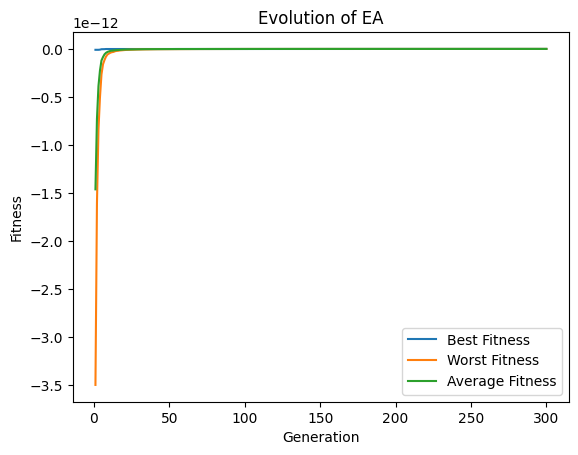

In [3]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

GENERATIONS = 300
POPULATION_SIZE = 100
PROB_CROSSOVER = 0.7
alpha = 0.5 
PROB_MUTATION = 0.3
MUTATION_STEP = 2

# Define your selection, crossover, mutation, and fitness_function functions here

population = generate_population(POPULATION_SIZE)

best_fitness = []
worst_fitness = []
average_fitness = []

for _ in range(GENERATIONS):
    # Select individuals for reproduction
    parents = selection(population)

    # Shuffle parents pool
    np.random.shuffle(parents)

    # Randomly pair solutions
    paired_parents = []
    num_parents = len(parents)
    for i in range(0, num_parents, 2):
        if i + 1 < num_parents:
            paired_parents.append([parents[i], parents[i + 1]])
        else:
            # If the number of parents is odd, handle the last parent separately
            paired_parents.append([parents[i]])

    offspring = []
    # Create new population through crossover and mutation
    for pair in paired_parents:
        parent1, parent2 = pair
        child1, child2 = crossover(parent1, parent2, PROB_CROSSOVER, alpha)
        offspring.append(mutation(child1, PROB_MUTATION, MUTATION_STEP))
        offspring.append(mutation(child2, PROB_MUTATION, MUTATION_STEP))

    # Combine the offspring and the population
    population += offspring

    # Calculate fitness values for the combined population
    fitness_values = [fitness_function(individual) for individual in population]

    # Sort the population based on fitness values
    population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

    # Keep the fittest individuals
    population = population[:POPULATION_SIZE]
    
    fitness_values = [fitness_function(individual) for individual in population]
    

    # Update best, worst, and average fitness
    best_fitness.append(fitness_function(population[0]))
    worst_fitness.append(fitness_function(population[-1]))
    average_fitness.append(np.mean(fitness_values))

# Obtain the best solution and its fitness
best_solution = population[0]
best_fitness_ever = best_fitness[-1]

# Convert best solution to expression format
a, b, c, d, e, f, g = best_solution
x = sp.symbols('x')
expression = (a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g) / ((4.74e-4) * (3e10))
best_expression = sp.simplify(expression)

# Print the best solution and its fitness
print("Best Solution:", best_solution)
print("\nCalculated expression:")
sp.pprint(best_expression, use_unicode=True)
print()
print("Best Fitness Ever:", best_fitness_ever)

# Plot the evolution graph
generations = range(1, GENERATIONS + 1)
plt.plot(generations, best_fitness, label='Best Fitness')
plt.plot(generations, worst_fitness, label='Worst Fitness')
plt.plot(generations, average_fitness, label='Average Fitness')
plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of EA')
plt.legend()
plt.show()

# 3.b.

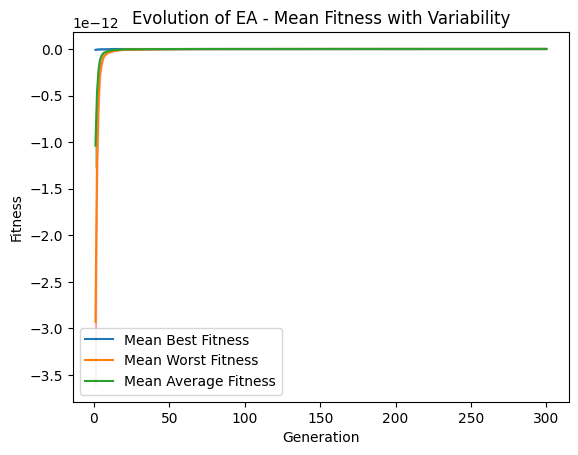

Run 1 - Best Solution: [-2.4886587816771097, 6.630469708451705, -4.349585643397673, 1.075335664563104, -1.1874074173378095, -0.6005038566910644, 0.006009978196415317]

Calculated expression:
                       6                        5                       4     
- 1.75011166081372e-7⋅x  + 4.66277757275085e-7⋅x  - 3.0587803399421e-7⋅x  + 7.

                   3                        2                                 
56213547512731e-8⋅x  - 8.35026313177081e-8⋅x  - 4.22295257869947e-8⋅x + 4.2264

              
2629846365e-10

Run 2 - Best Solution: [-1.1129073285156152, 2.744399507731182, -1.853956531307153, 1.7046747886938363, -1.3448647968271263, -0.9908167806328493, 0.009105428034574176]

Calculated expression:
                       6                        5                        4    
- 7.82635252120686e-8⋅x  + 1.92995745972657e-7⋅x  - 1.30376689965341e-7⋅x  + 1

                    3                        2                                
.19878677123336e-7⋅x  - 9.4575

In [6]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

GENERATIONS = 300
POPULATION_SIZE = 100
PROB_CROSSOVER = 0.7
alpha = 0.5 
PROB_MUTATION = 0.3
MUTATION_STEP = 2
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each run
best_fitness_runs = []
worst_fitness_runs = []
average_fitness_runs = []
best_solutions = []

for run in range(NUM_RUNS):
    population = generate_population(POPULATION_SIZE)

    best_fitness = []
    worst_fitness = []
    average_fitness = []

    for _ in range(GENERATIONS):
        # Select individuals for reproduction
        parents = selection(population)

        # Shuffle parents pool
        np.random.shuffle(parents)

        # Randomly pair solutions
        paired_parents = []
        num_parents = len(parents)
        for i in range(0, num_parents, 2):
            if i + 1 < num_parents:
                paired_parents.append([parents[i], parents[i + 1]])
            else:
                # If the number of parents is odd, handle the last parent separately
                paired_parents.append([parents[i]])

        offspring = []
        # Create new population through crossover and mutation
        for pair in paired_parents:
            parent1, parent2 = pair
            child1, child2 = crossover(parent1, parent2, PROB_CROSSOVER, alpha)
            offspring.append(mutation(child1, PROB_MUTATION, MUTATION_STEP))
            offspring.append(mutation(child2, PROB_MUTATION, MUTATION_STEP))

        # Combine the offspring and the population
        population += offspring

        # Calculate fitness values for the combined population
        fitness_values = [fitness_function(individual) for individual in population]

        # Sort the population based on fitness values
        population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

        # Keep the fittest individuals
        population = population[:POPULATION_SIZE]

        fitness_values = [fitness_function(individual) for individual in population]

        # Update best, worst, and average fitness
        best_fitness.append(fitness_function(population[0]))
        worst_fitness.append(fitness_function(population[-1]))
        average_fitness.append(np.mean(fitness_values))

    # Store the best, worst, and average fitness values for the current run
    best_fitness_runs.append(best_fitness)
    worst_fitness_runs.append(worst_fitness)
    average_fitness_runs.append(average_fitness)

    # Store the best solution of the current run
    best_solution = population[0]
    best_solutions.append(best_solution)

# Calculate the mean of the best, worst, and average fitness values across runs
mean_best_fitness = np.mean(best_fitness_runs, axis=0)
mean_worst_fitness = np.mean(worst_fitness_runs, axis=0)
mean_average_fitness = np.mean(average_fitness_runs, axis=0)

# Calculate the standard deviation of fitness values across runs
std_best_fitness = np.std(best_fitness_runs, axis=0)
std_worst_fitness = np.std(worst_fitness_runs, axis=0)
std_average_fitness = np.std(average_fitness_runs, axis=0)

# Plot the mean fitness values
plt.plot(generations, mean_best_fitness, label='Mean Best Fitness')
plt.plot(generations, mean_worst_fitness, label='Mean Worst Fitness')
plt.plot(generations, mean_average_fitness, label='Mean Average Fitness')

# Plot the shaded region representing the variability
plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3, color='blue')
plt.fill_between(generations, mean_worst_fitness - std_worst_fitness, mean_worst_fitness + std_worst_fitness, alpha=0.3, color='red')
plt.fill_between(generations, mean_average_fitness - std_average_fitness, mean_average_fitness + std_average_fitness, alpha=0.3, color='green')

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of EA - Mean Fitness with Variability')
plt.legend()
plt.show()

# Print the best solution and its fitness for each run
for run in range(NUM_RUNS):
    print(f"Run {run+1} - Best Solution:", best_solutions[run])
    print("\nCalculated expression:")
    a, b, c, d, e, f, g = best_solutions[run]
    x = sp.symbols('x')
    expression = (a * x**6 + b * x**5 + c * x**4 + d * x**3 + e * x**2 + f * x + g) / ((4.74e-4) * (3e10))
    best_expression = sp.simplify(expression)
    sp.pprint(best_expression, use_unicode=True)
    print()

# 3.c.

Run 1 - Best Solution for Population Size 50:
[-1.086595081333082, 0.8697432559406179, 2.586607790503809, -0.4985270921213902, -1.8860740238330733, -0.9620119969335413, 0.09569351227694939]

Run 2 - Best Solution for Population Size 50:
[-0.603376877967504, 0.45545395956139106, 2.509230820236155, -2.3217376907713576, 0.11089422298474352, -1.1378294702569796, 0.08010794093728227]

Run 3 - Best Solution for Population Size 50:
[-0.4749294679477112, 2.2733640531900834, -2.122695193634958, 0.4870699076905515, -1.232491872034127, 0.18187175319228488, -0.1309754254039438]

Run 4 - Best Solution for Population Size 50:
[-0.5630572348898454, 1.3668067314334622, -0.26863371360068544, 1.099163139970263, -3.021131520035747, 0.44093549245715946, -0.05358656759769999]

Run 5 - Best Solution for Population Size 50:
[-1.1953788966489929, 1.9318616362792222, 0.8102420521050921, -0.4029010387728642, -1.0286260461957593, -1.0054679797511448, 0.05531236309201528]

Run 1 - Best Solution for Population Siz

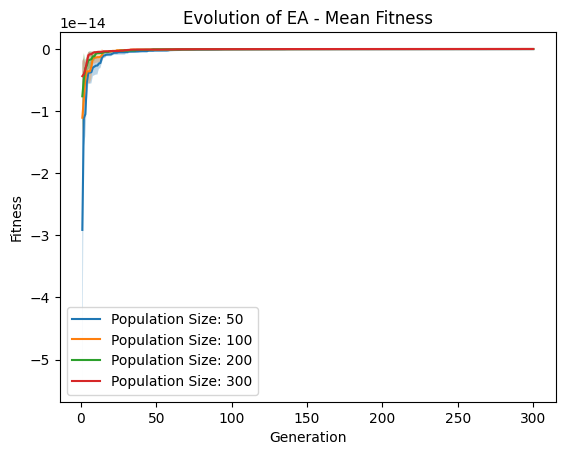

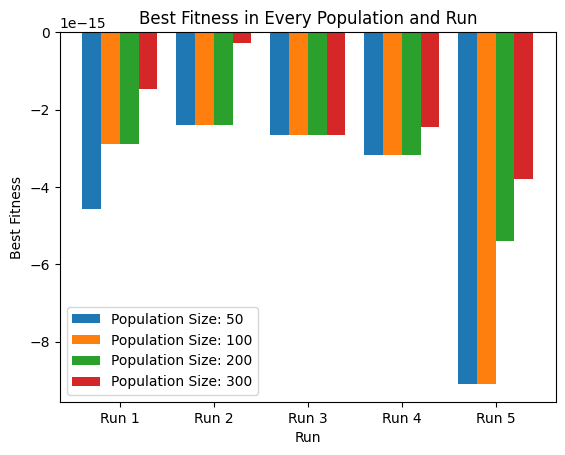

In [7]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

GENERATIONS = 300
POPULATION_SIZES = [50, 100, 200, 300]
PROB_CROSSOVER = 0.7
alpha = 0.5 
PROB_MUTATION = 0.3
MUTATION_STEP = 2
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each population size
mean_best_fitness_values = []
std_best_fitness_values = []

for population_size in POPULATION_SIZES:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, PROB_CROSSOVER, alpha)
                offspring.append(mutation(child1, PROB_MUTATION, MUTATION_STEP))
                offspring.append(mutation(child2, PROB_MUTATION, MUTATION_STEP))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current population size
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run+1} - Best Solution for Population Size {population_size}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, population_size in enumerate(POPULATION_SIZES):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Population Size: {population_size}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

    

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of EA - Mean Fitness')
plt.legend()
plt.show()

# Create a bar chart for best fitness in every population and run
x = np.arange(NUM_RUNS)
width = 0.2

for i, population_size in enumerate(POPULATION_SIZES):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f'Population Size: {population_size}', bottom=0)

plt.xlabel('Run')
plt.ylabel('Best Fitness')
plt.title('Best Fitness in Every Population and Run')
plt.xticks(x + width * (len(POPULATION_SIZES) - 1) / 2, [f'Run {i+1}' for i in range(NUM_RUNS)])
plt.legend()
plt.show()

# 3.d.

Run 1 - Best Solution for Crossover Probability 0.3:
[-0.7573378557466727, 0.7559518997631351, 2.408190564722279, -2.075701355488353, -0.48037031815355646, -0.7833063916960721, 0.0193452483588899]

Run 2 - Best Solution for Crossover Probability 0.3:
[-1.5591142017664905, 2.498270963320955, 2.7957090986354793, -5.122059344699739, 1.6036619836343438, -1.1180447432330558, 0.01162046154225372]

Run 3 - Best Solution for Crossover Probability 0.3:
[0.09155785175907916, -0.17711306216989886, -0.09278010690007743, 1.926882148454699, -2.1649438346988665, -0.5129481405230243, 0.020115467930542447]

Run 4 - Best Solution for Crossover Probability 0.3:
[-0.8504125742533191, 0.9869693399153797, 1.750226117998479, -0.44434815203860484, -2.1792315570308407, -0.16608486270921857, 0.029024429623987602]

Run 5 - Best Solution for Crossover Probability 0.3:
[0.6277939286510295, -2.4965228689358723, 3.573228317685506, -1.0157617078538215, -0.33326697176657705, -1.3722333362221588, 0.07656591865885208]



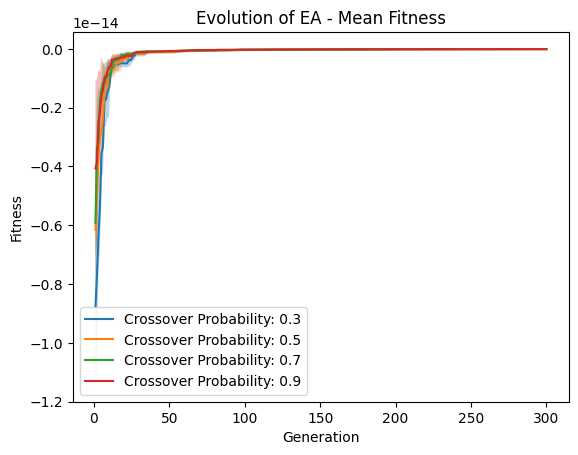

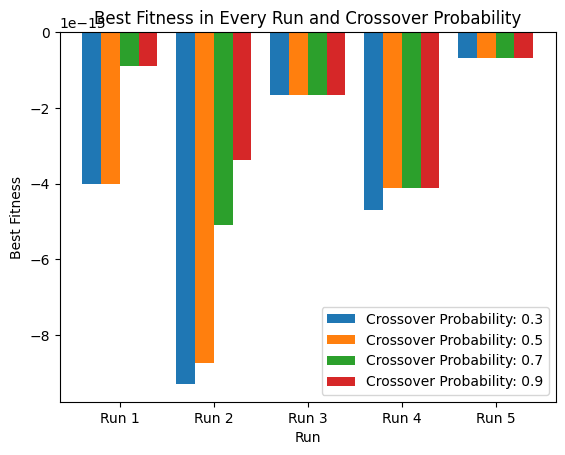

In [8]:
import numpy as np
import matplotlib.pyplot as plt

GENERATIONS = 300
CROSSOVER_PROBABILITIES = [0.3, 0.5, 0.7, 0.9]
alpha = 0.5 
PROB_MUTATION = 0.3
MUTATION_STEP = 2
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each crossover probability
mean_best_fitness_values = []
std_best_fitness_values = []

for crossover_prob in CROSSOVER_PROBABILITIES:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, crossover_prob, alpha)
                offspring.append(mutation(child1, PROB_MUTATION, MUTATION_STEP))
                offspring.append(mutation(child2, PROB_MUTATION, MUTATION_STEP))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current crossover probability
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run+1} - Best Solution for Crossover Probability {crossover_prob}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, crossover_prob in enumerate(CROSSOVER_PROBABILITIES):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Crossover Probability: {crossover_prob}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of EA - Mean Fitness')
plt.legend()
plt.show()

# Create a bar chart for best fitness in every run and crossover probability
x = np.arange(NUM_RUNS)
width = 0.2

for i, crossover_prob in enumerate(CROSSOVER_PROBABILITIES):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f'Crossover Probability: {crossover_prob}', bottom=0)

plt.xlabel('Run')
plt.ylabel('Best Fitness')
plt.title('Best Fitness in Every Run and Crossover Probability')
plt.xticks(x + width * (len(CROSSOVER_PROBABILITIES) - 1) / 2, [f'Run {i+1}' for i in range(NUM_RUNS)])
plt.legend()
plt.show()


# 3.e.

Run 1 - Best Solution for Alpha 0.1:
[-1.0305515054711518, 3.378765257396562, -3.1616419234014073, 1.906616073799631, -1.62437335174587, -0.3363055386973127, -0.04422046580526044]

Run 2 - Best Solution for Alpha 0.1:
[0.9869106080911583, -3.2236137621694114, 3.1845878524822195, 1.010253424995653, -2.3958337257532487, -0.5084786723794108, -0.01974194927592159]

Run 3 - Best Solution for Alpha 0.1:
[-0.2989081236954728, 0.1034491101671757, 1.558277433280767, -0.03378814752627665, -2.1840793521739115, -0.11071492873372148, 0.026757004941330723]

Run 4 - Best Solution for Alpha 0.1:
[0.18401290446412544, -0.375766421990241, -0.9822858721787793, 4.07062624838251, -2.9305122265458268, -0.9103237794895203, 0.0349284984859719]

Run 5 - Best Solution for Alpha 0.1:
[-0.5052219898945005, 0.5839159316588667, 1.009791620478234, 0.6206563889930775, -2.5003252967991507, -0.14299420821879116, -0.008031703011425287]

Run 1 - Best Solution for Alpha 0.3:
[-0.1105967506087826, 0.4522990394628503, -0.37

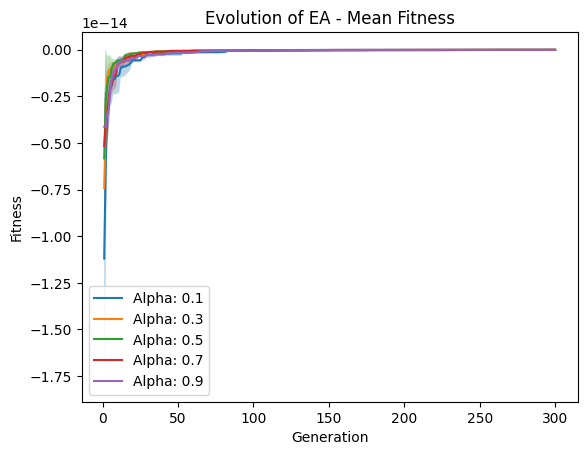

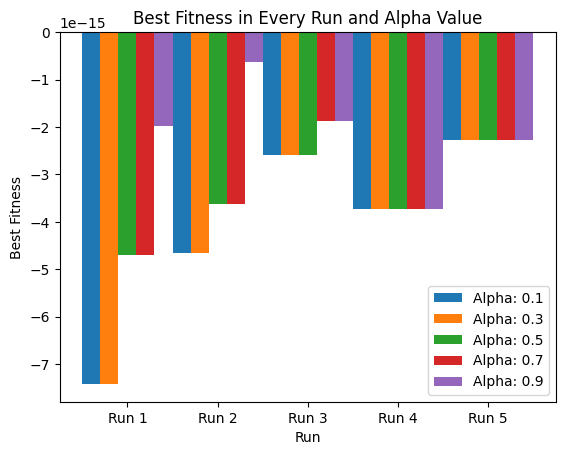

In [9]:
import numpy as np
import matplotlib.pyplot as plt

GENERATIONS = 300
CROSSOVER_PROBABILITY = 0.7
ALPHAS = [0.1, 0.3, 0.5, 0.7, 0.9]
PROB_MUTATION = 0.3
MUTATION_STEP = 2
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each alpha value
mean_best_fitness_values = []
std_best_fitness_values = []

for alpha in ALPHAS:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, CROSSOVER_PROBABILITY, alpha)
                offspring.append(mutation(child1, PROB_MUTATION, MUTATION_STEP))
                offspring.append(mutation(child2, PROB_MUTATION, MUTATION_STEP))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current alpha value
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run + 1} - Best Solution for Alpha {alpha}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, alpha in enumerate(ALPHAS):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f"Alpha: {alpha}")
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness,
                     alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of EA - Mean Fitness")
plt.legend()
plt.show()

# Create a bar chart for best fitness in every run and alpha value
x = np.arange(NUM_RUNS)
width = 0.2

for i, alpha in enumerate(ALPHAS):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f"Alpha: {alpha}", bottom=0)

plt.xlabel("Run")
plt.ylabel("Best Fitness")
plt.title("Best Fitness in Every Run and Alpha Value")
plt.xticks(x + width * (len(ALPHAS) - 1) / 2, [f"Run {i + 1}" for i in range(NUM_RUNS)])
plt.legend()
plt.show()

# 3.f.

Run 1 - Best Solution for Mutation Rate 0.1:
[-0.08683833534829599, -0.13930013257240137, 1.1661133547677103, 0.34116127166208127, -2.0268394339401006, -0.2227540984309605, -0.0014381372354748787]

Run 2 - Best Solution for Mutation Rate 0.1:
[-1.3741991348863611, 2.5016895908873287, -0.0509276978152736, 1.439307799349925, -3.766265605452846, 0.4040473392977384, -0.044135273823522565]

Run 3 - Best Solution for Mutation Rate 0.1:
[-2.2082678504375317, 4.293954971765477, 0.9942744288705433, -3.5188548173422323, 0.14162753133188155, -0.6098993685000528, 0.0026785067337604194]

Run 4 - Best Solution for Mutation Rate 0.1:
[-0.742665061321486, 1.9596173473627703, -0.39976950505121933, -0.40917738404710063, -1.1797004355862117, -0.12227224445525542, -0.06897111445446151]

Run 5 - Best Solution for Mutation Rate 0.1:
[0.1960842627803734, -2.5395845707639473, 6.14191451553551, -2.4927600428881638, -2.9352277416898103, 0.7661352691360878, -0.09290991745846952]

Run 1 - Best Solution for Mutati

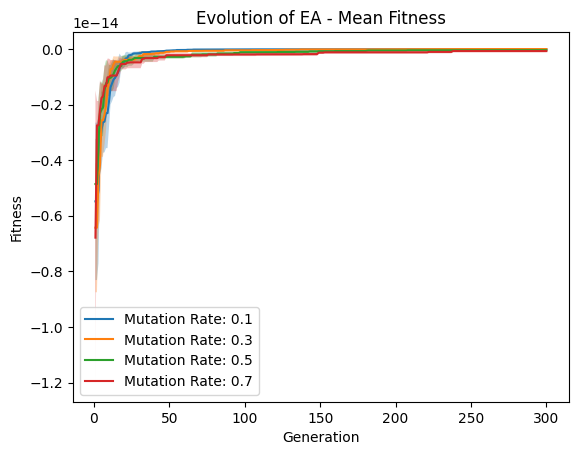

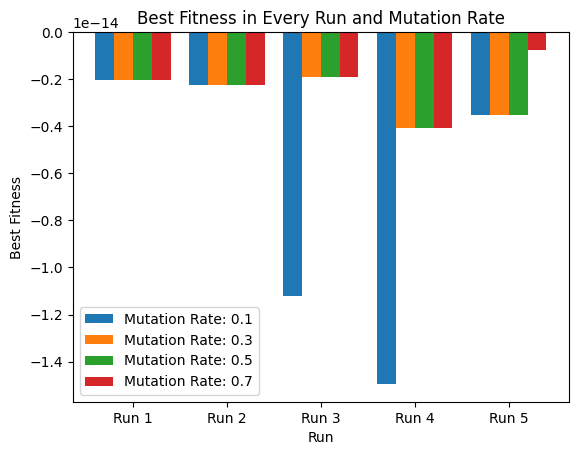

In [10]:
import numpy as np
import matplotlib.pyplot as plt

GENERATIONS = 300
CROSSOVER_PROBABILITY = 0.7
ALPHAS = 0.5
PROB_MUTATIONS = [0.1, 0.3, 0.5, 0.7]
MUTATION_STEP = 2
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each alpha value
mean_best_fitness_values = []
std_best_fitness_values = []

for prob_mutation in PROB_MUTATIONS:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, CROSSOVER_PROBABILITY, alpha)
                offspring.append(mutation(child1, prob_mutation, MUTATION_STEP))
                offspring.append(mutation(child2, prob_mutation, MUTATION_STEP))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current mutation rate
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run + 1} - Best Solution for Mutation Rate {prob_mutation}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, prob_mutation in enumerate(PROB_MUTATIONS):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f"Mutation Rate: {prob_mutation}")
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness,
                     alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of EA - Mean Fitness")
plt.legend()
plt.show()

# Create a bar chart for best fitness in every run and mutation rate
x = np.arange(NUM_RUNS)
width = 0.2

for i, prob_mutation in enumerate(PROB_MUTATIONS):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f"Mutation Rate: {prob_mutation}", bottom=0)

plt.xlabel("Run")
plt.ylabel("Best Fitness")
plt.title("Best Fitness in Every Run and Mutation Rate")
plt.xticks(x + width * (len(PROB_MUTATIONS) - 1) / 2, [f"Run {i + 1}" for i in range(NUM_RUNS)])
plt.legend()
plt.show()

# 3.h.

Run 1 - Best Solution for Mutation Step Size 0.1:
[-0.5531139492076488, 1.2258010253804403, 0.3370423535405238, -0.9972634634823425, 0.2674456572009961, -1.2588406262904361, 0.03383943236228438]

Run 2 - Best Solution for Mutation Step Size 0.1:
[-0.7678713989325785, 1.2128642798374143, 1.3744207435678628, -1.690053825489695, -0.09142038471397237, -0.9814309430698487, 0.028637031748591207]

Run 3 - Best Solution for Mutation Step Size 0.1:
[0.18315134000199568, -1.9830984530376963, 4.232329458737685, -0.9822497563880335, -2.0385282480749654, -0.31621642485756596, -0.0032213922399912127]

Run 4 - Best Solution for Mutation Step Size 0.1:
[-0.6428721286691166, 1.4123071221031773, -0.2677974970411564, 0.5439334361753175, -1.1537125864196773, -0.8191017674013242, 0.019590628693443794]

Run 5 - Best Solution for Mutation Step Size 0.1:
[-0.2668980251270295, -0.1189411862976324, 1.6591422570067023, 0.2799475293924665, -2.172856923324076, -0.2740108638851914, -0.01832700588384583]

Run 1 - Be

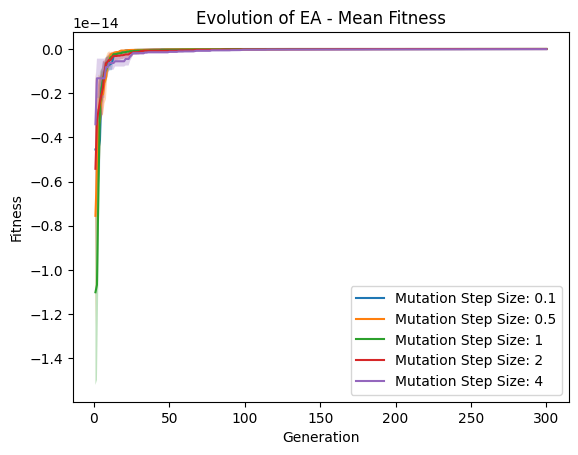

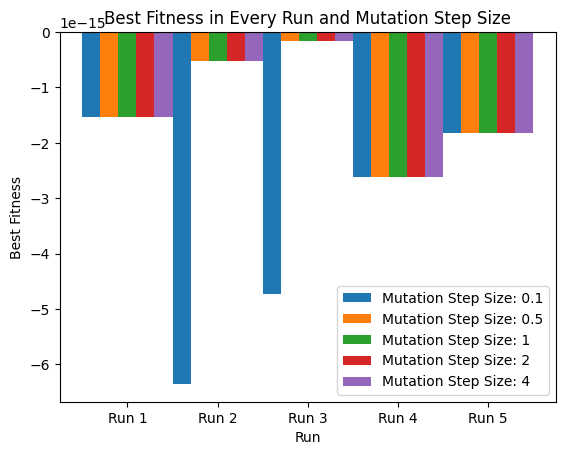

In [11]:
import numpy as np
import matplotlib.pyplot as plt

GENERATIONS = 300
CROSSOVER_PROBABILITY = 0.7
ALPHA = 0.5
PROB_MUTATION = 0.3
MUTATION_STEPS = [0.1, 0.5, 1, 2, 4]
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each mutation step size
mean_best_fitness_values = []
std_best_fitness_values = []

for mutation_step in MUTATION_STEPS:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, CROSSOVER_PROBABILITY, ALPHA)
                offspring.append(mutation(child1, PROB_MUTATION, mutation_step))
                offspring.append(mutation(child2, PROB_MUTATION, mutation_step))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current mutation step size
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run + 1} - Best Solution for Mutation Step Size {mutation_step}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, mutation_step in enumerate(MUTATION_STEPS):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f"Mutation Step Size: {mutation_step}")
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness,
                     alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of EA - Mean Fitness")
plt.legend()
plt.show()

# Create a bar chart for best fitness in every run and mutation step size
x = np.arange(NUM_RUNS)
width = 0.2

for i, mutation_step in enumerate(MUTATION_STEPS):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f"Mutation Step Size: {mutation_step}", bottom=0)

plt.xlabel("Run")
plt.ylabel("Best Fitness")
plt.title("Best Fitness in Every Run and Mutation Step Size")
plt.xticks(x + width * (len(MUTATION_STEPS) - 1) / 2, [f"Run {i + 1}" for i in range(NUM_RUNS)])
plt.legend()
plt.show()

# 3.i.

# I just gave the code to best solution in each part that you can consider

# 3.j.

# It is Optional

In [12]:
def selection(population):
    selected = []
    while len(selected) < len(population):
        # Randomly select two individuals from the population
        individual1 = random.choice(population)
        individual2 = random.choice(population)
        
        # Compare their fitness values
        fitness1 = fitness_function(individual1)
        fitness2 = fitness_function(individual2)
        
        # Select the individual with the higher fitness value
        if fitness1 > fitness2:
            selected.append(individual1)
        else:
            selected.append(individual2)
    return selected

# 3.j for jim

Run 1 - Best Solution for Population Size 50:
[2.9995457066638296, -6.015473665553148, 2.397689593020724, 0.760176489455886, -1.037649119773551, -0.3534757500736485, 0.007156131814932019]

Run 2 - Best Solution for Population Size 50:
[-1.770060800111052, 4.536986279784926, -1.385917800468147, -2.059918502333673, 0.31623593649798215, -0.6651941946559432, 0.03769101671680544]

Run 3 - Best Solution for Population Size 50:
[1.3376214973718827, -1.7460692785789798, -0.5694322902650814, 0.7480622440105994, -0.39117090777721053, -0.24426134861937418, -0.1654121334962773]

Run 4 - Best Solution for Population Size 50:
[-0.8485043230647464, -1.0372665174715572, 7.716223228762939, -5.6015091003680215, -1.490037564032944, 0.5932258185128552, -0.15045664099150763]

Run 5 - Best Solution for Population Size 50:
[-1.9922941558134113, 4.082731582149362, -0.9654621421511286, -0.1806697981671704, -0.3959388660442269, -1.3476913701967816, 0.044543515392397925]

Run 1 - Best Solution for Population Siz

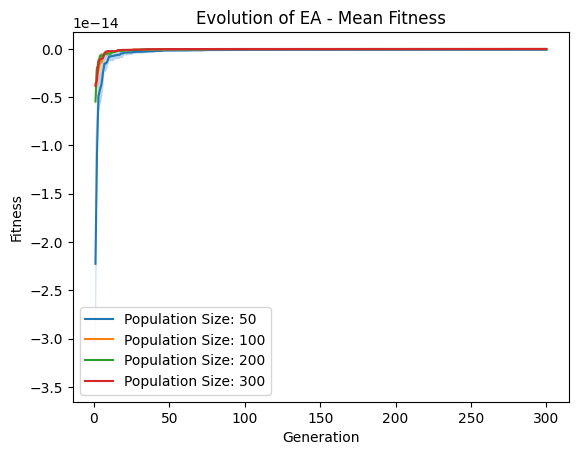

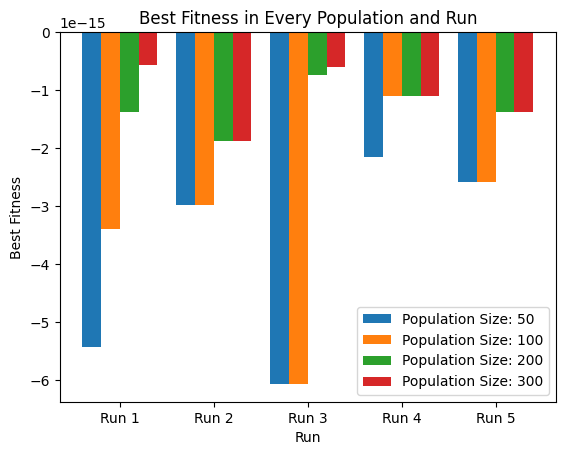

In [13]:
import numpy as np
import matplotlib.pyplot as plt
import sympy as sp

GENERATIONS = 300
POPULATION_SIZES = [50, 100, 200, 300]
PROB_CROSSOVER = 0.7
alpha = 0.5 
PROB_MUTATION = 0.3
MUTATION_STEP = 2
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each population size
mean_best_fitness_values = []
std_best_fitness_values = []

for population_size in POPULATION_SIZES:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, PROB_CROSSOVER, alpha)
                offspring.append(mutation(child1, PROB_MUTATION, MUTATION_STEP))
                offspring.append(mutation(child2, PROB_MUTATION, MUTATION_STEP))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current population size
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run+1} - Best Solution for Population Size {population_size}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, population_size in enumerate(POPULATION_SIZES):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Population Size: {population_size}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of EA - Mean Fitness')
plt.legend()
plt.show()

# Create a bar chart for best fitness in every population and run
x = np.arange(NUM_RUNS)
width = 0.2

for i, population_size in enumerate(POPULATION_SIZES):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f'Population Size: {population_size}', bottom=0)

plt.xlabel('Run')
plt.ylabel('Best Fitness')
plt.title('Best Fitness in Every Population and Run')
plt.xticks(x + width * (len(POPULATION_SIZES) - 1) / 2, [f'Run {i+1}' for i in range(NUM_RUNS)])
plt.legend()
plt.show()

# 3.j for dal

Run 1 - Best Solution for Crossover Probability 0.3:
[-1.1168616158685096, 1.0706871848404125, 2.349738655896841, -0.31838445298899065, -2.572371404662719, -0.30278798619890857, 0.03053489438893586]

Run 2 - Best Solution for Crossover Probability 0.3:
[-1.003228575674778, 1.7692815372018587, 1.159842601801804, -1.8532701535178764, -0.15361847564882763, -0.809024863112303, -0.0004906256572897856]

Run 3 - Best Solution for Crossover Probability 0.3:
[-0.9830555457150815, 1.129689892997554, 2.4164817082120504, -1.7343131138299328, -1.5647369532224018, -0.1128679967366616, -0.03545070610845169]

Run 4 - Best Solution for Crossover Probability 0.3:
[0.5957022839175945, -1.8460858296108824, 2.1512498973064726, -0.26459699325530917, -0.376059833684031, -1.2285315930118026, 0.04263585425431031]

Run 5 - Best Solution for Crossover Probability 0.3:
[0.7906533406966395, -2.505230208892077, 1.5042341081497828, 3.8982739093974885, -4.965600840303372, 0.36203142243454356, -0.019605648231162322]



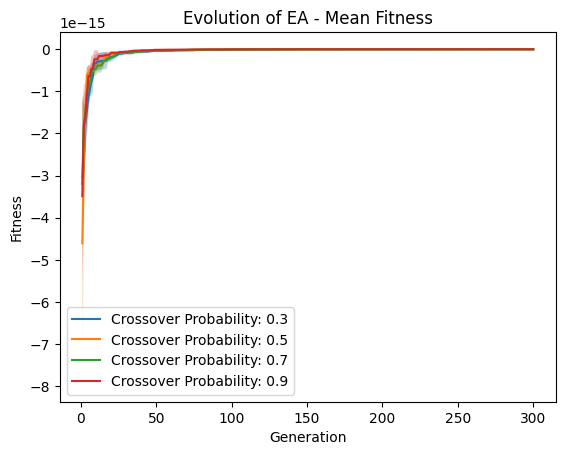

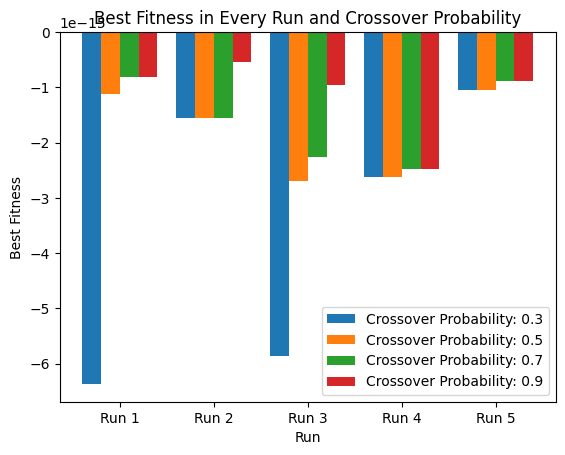

In [14]:
import numpy as np
import matplotlib.pyplot as plt

GENERATIONS = 300
CROSSOVER_PROBABILITIES = [0.3, 0.5, 0.7, 0.9]
alpha = 0.5 
PROB_MUTATION = 0.3
MUTATION_STEP = 2
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each crossover probability
mean_best_fitness_values = []
std_best_fitness_values = []

for crossover_prob in CROSSOVER_PROBABILITIES:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, crossover_prob, alpha)
                offspring.append(mutation(child1, PROB_MUTATION, MUTATION_STEP))
                offspring.append(mutation(child2, PROB_MUTATION, MUTATION_STEP))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current crossover probability
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run+1} - Best Solution for Crossover Probability {crossover_prob}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, crossover_prob in enumerate(CROSSOVER_PROBABILITIES):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f'Crossover Probability: {crossover_prob}')
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness, alpha=0.3)

plt.xlabel('Generation')
plt.ylabel('Fitness')
plt.title('Evolution of EA - Mean Fitness')
plt.legend()
plt.show()

# Create a bar chart for best fitness in every run and crossover probability
x = np.arange(NUM_RUNS)
width = 0.2

for i, crossover_prob in enumerate(CROSSOVER_PROBABILITIES):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f'Crossover Probability: {crossover_prob}', bottom=0)

plt.xlabel('Run')
plt.ylabel('Best Fitness')
plt.title('Best Fitness in Every Run and Crossover Probability')
plt.xticks(x + width * (len(CROSSOVER_PROBABILITIES) - 1) / 2, [f'Run {i+1}' for i in range(NUM_RUNS)])
plt.legend()
plt.show()


# 3.j for he

Run 1 - Best Solution for Alpha 0.1:
[-1.3697539851579243, 3.1491788580183426, -2.0215606467024108, 2.4994304646324332, -2.3907367117837746, -0.7936596572066589, 0.08138492461913142]

Run 2 - Best Solution for Alpha 0.1:
[-0.10604039113714628, -0.962051999733166, 4.118517608656114, -3.6247496717447985, 0.6811391512901112, -1.0383171636095794, 0.009938918286697532]

Run 3 - Best Solution for Alpha 0.1:
[-1.0145850851397311, 2.29913407550594, 0.12971434003357477, -0.9822117438618989, -1.4745772132216126, 0.15380123647910512, -0.07830321463649269]

Run 4 - Best Solution for Alpha 0.1:
[-0.893725552089971, 2.579667000510433, -0.967918896601399, -1.6838303056907309, 1.642023363229956, -1.649974007024019, 0.044691782019474866]

Run 5 - Best Solution for Alpha 0.1:
[-0.5674999338327111, 2.318010304578374, -3.5309633955079462, 3.172324034720437, -0.6159011631392277, -1.7243263746229636, 0.08165444157317481]

Run 1 - Best Solution for Alpha 0.3:
[-1.0862573028314002, 2.181822985196857, -0.94464

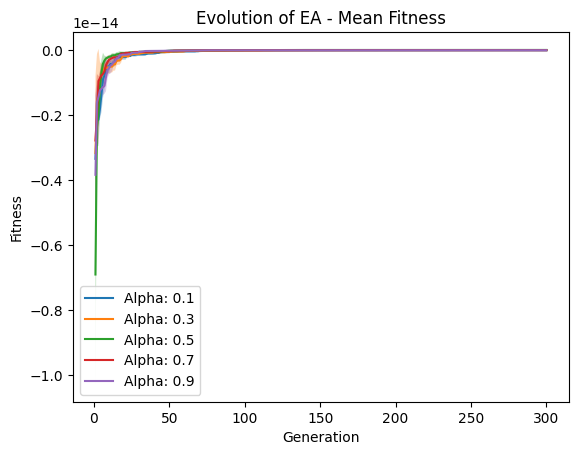

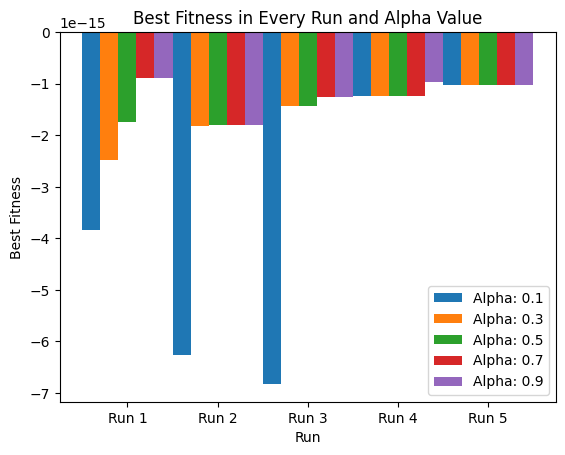

In [15]:
import numpy as np
import matplotlib.pyplot as plt

GENERATIONS = 300
CROSSOVER_PROBABILITY = 0.7
ALPHAS = [0.1, 0.3, 0.5, 0.7, 0.9]
PROB_MUTATION = 0.3
MUTATION_STEP = 2
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each alpha value
mean_best_fitness_values = []
std_best_fitness_values = []

for alpha in ALPHAS:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, CROSSOVER_PROBABILITY, alpha)
                offspring.append(mutation(child1, PROB_MUTATION, MUTATION_STEP))
                offspring.append(mutation(child2, PROB_MUTATION, MUTATION_STEP))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current alpha value
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run + 1} - Best Solution for Alpha {alpha}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, alpha in enumerate(ALPHAS):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f"Alpha: {alpha}")
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness,
                     alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of EA - Mean Fitness")
plt.legend()
plt.show()

# Create a bar chart for best fitness in every run and alpha value
x = np.arange(NUM_RUNS)
width = 0.2

for i, alpha in enumerate(ALPHAS):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f"Alpha: {alpha}", bottom=0)

plt.xlabel("Run")
plt.ylabel("Best Fitness")
plt.title("Best Fitness in Every Run and Alpha Value")
plt.xticks(x + width * (len(ALPHAS) - 1) / 2, [f"Run {i + 1}" for i in range(NUM_RUNS)])
plt.legend()
plt.show()

# 3.j for vav

Run 1 - Best Solution for Mutation Rate 0.1:
[-0.34268325718037396, 1.8067792709210853, -1.6978874247012614, -0.8784988542569833, 2.1892066815513624, -2.088028634821291, 0.06920581429699715]

Run 2 - Best Solution for Mutation Rate 0.1:
[-1.064001370267679, 1.4833233444776823, 2.3265219120942677, -2.64673262306641, -0.49294661264649114, -0.5597637191363366, 0.01890130090515169]

Run 3 - Best Solution for Mutation Rate 0.1:
[-1.9667762024009852, 5.2065617575995065, -3.292613221567247, 1.2658768469904915, -2.0635014713082125, 0.020986598150935128, -0.07873313133258576]

Run 4 - Best Solution for Mutation Rate 0.1:
[-0.19540093353360222, 0.7801962272676612, -1.4023619069953743, 1.898864102314141, -0.05165000272936732, -1.9308537558023156, 0.07182474986694203]

Run 5 - Best Solution for Mutation Rate 0.1:
[-1.1143351255979757, 1.4377661070838923, 2.0143543414765346, -2.0315478915869654, 0.40082436771572016, -1.7095188706576436, 0.13467962325763996]

Run 1 - Best Solution for Mutation Rate 

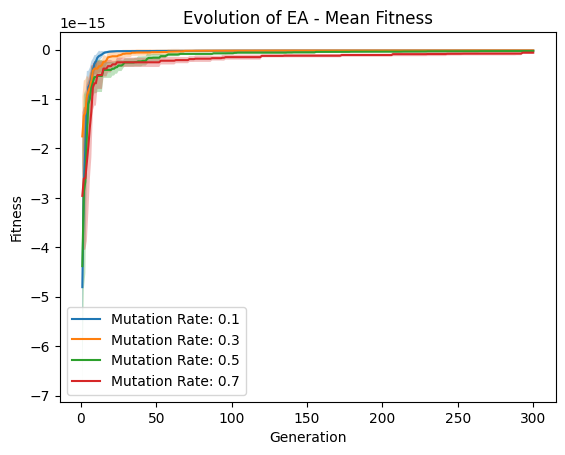

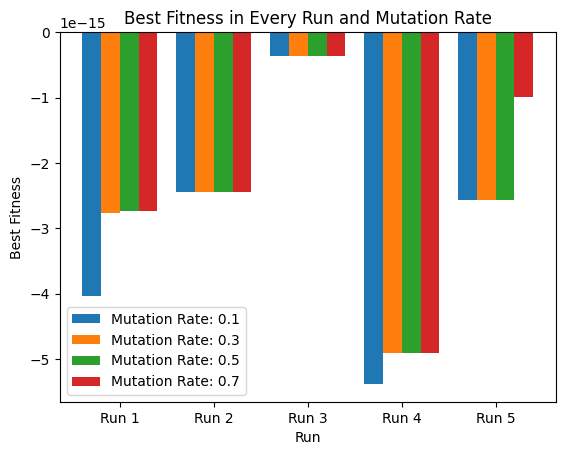

In [16]:
import numpy as np
import matplotlib.pyplot as plt

GENERATIONS = 300
CROSSOVER_PROBABILITY = 0.7
ALPHAS = 0.5
PROB_MUTATIONS = [0.1, 0.3, 0.5, 0.7]
MUTATION_STEP = 2
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each alpha value
mean_best_fitness_values = []
std_best_fitness_values = []

for prob_mutation in PROB_MUTATIONS:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, CROSSOVER_PROBABILITY, alpha)
                offspring.append(mutation(child1, prob_mutation, MUTATION_STEP))
                offspring.append(mutation(child2, prob_mutation, MUTATION_STEP))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current mutation rate
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run + 1} - Best Solution for Mutation Rate {prob_mutation}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, prob_mutation in enumerate(PROB_MUTATIONS):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f"Mutation Rate: {prob_mutation}")
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness,
                     alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of EA - Mean Fitness")
plt.legend()
plt.show()

# Create a bar chart for best fitness in every run and mutation rate
x = np.arange(NUM_RUNS)
width = 0.2

for i, prob_mutation in enumerate(PROB_MUTATIONS):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f"Mutation Rate: {prob_mutation}", bottom=0)

plt.xlabel("Run")
plt.ylabel("Best Fitness")
plt.title("Best Fitness in Every Run and Mutation Rate")
plt.xticks(x + width * (len(PROB_MUTATIONS) - 1) / 2, [f"Run {i + 1}" for i in range(NUM_RUNS)])
plt.legend()
plt.show()

# 3.j for z

Run 1 - Best Solution for Mutation Step Size 0.1:
[-0.5608407762052189, -0.12400175695173674, 3.287178520801264, -1.219691186503138, -2.2795968627910783, 0.006308903834502708, -0.027855501514242688]

Run 2 - Best Solution for Mutation Step Size 0.1:
[-0.5320230511190905, 1.1056437435288389, -0.03536650408819929, 0.543437969743136, -1.215614530541997, -0.8003409004366903, 0.021424634047102827]

Run 3 - Best Solution for Mutation Step Size 0.1:
[-0.41729533837913924, 0.34079214487987175, 1.331240004378106, -0.06045203455651861, -1.5158861430719126, -0.6021321878800067, 0.015079927207936716]

Run 4 - Best Solution for Mutation Step Size 0.1:
[-1.6620206951384833, 3.431276404340379, 0.014789222440629971, -1.4500583625228454, -0.5563807986114373, -0.6915694095238495, 0.018095157064515525]

Run 5 - Best Solution for Mutation Step Size 0.1:
[-0.9247876600271201, 2.126303291957155, -0.8862090474353713, 1.1444022634910243, -1.8116626209192788, -0.5814076873065739, 0.02157488774426958]

Run 1 - 

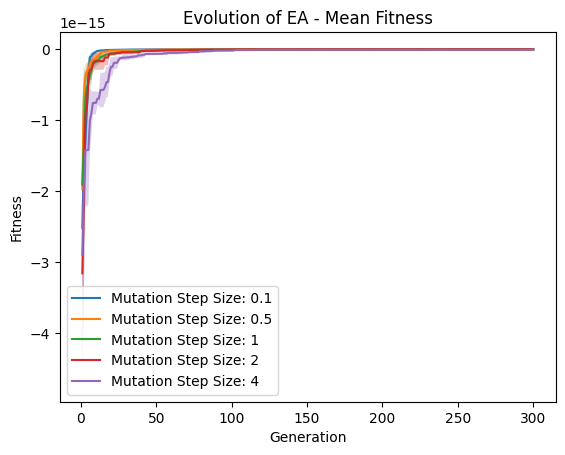

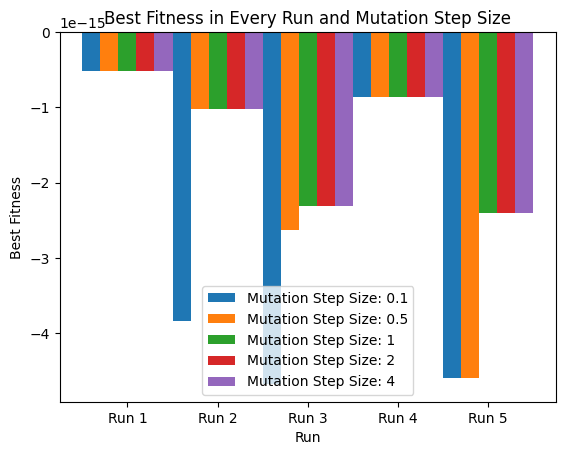

In [17]:
import numpy as np
import matplotlib.pyplot as plt

GENERATIONS = 300
CROSSOVER_PROBABILITY = 0.7
ALPHA = 0.5
PROB_MUTATION = 0.3
MUTATION_STEPS = [0.1, 0.5, 1, 2, 4]
NUM_RUNS = 5

# Define your selection, crossover, mutation, and fitness_function functions here

# Define lists to store the results for each mutation step size
mean_best_fitness_values = []
std_best_fitness_values = []

for mutation_step in MUTATION_STEPS:
    best_fitness_runs = []
    best_solutions = []

    for run in range(NUM_RUNS):
        population = generate_population(population_size)

        best_fitness = []

        for _ in range(GENERATIONS):
            # Select individuals for reproduction
            parents = selection(population)

            # Shuffle parents pool
            np.random.shuffle(parents)

            # Randomly pair solutions
            paired_parents = []
            num_parents = len(parents)
            for i in range(0, num_parents, 2):
                if i + 1 < num_parents:
                    paired_parents.append([parents[i], parents[i + 1]])
                else:
                    # If the number of parents is odd, handle the last parent separately
                    paired_parents.append([parents[i]])

            offspring = []
            # Create new population through crossover and mutation
            for pair in paired_parents:
                parent1, parent2 = pair
                child1, child2 = crossover(parent1, parent2, CROSSOVER_PROBABILITY, ALPHA)
                offspring.append(mutation(child1, PROB_MUTATION, mutation_step))
                offspring.append(mutation(child2, PROB_MUTATION, mutation_step))

            # Combine the offspring and the population
            population += offspring

            # Calculate fitness values for the combined population
            fitness_values = [fitness_function(individual) for individual in population]

            # Sort the population based on fitness values
            population = [x for _, x in sorted(zip(fitness_values, population), reverse=True)]

            # Keep the fittest individuals
            population = population[:population_size]

            fitness_values = [fitness_function(individual) for individual in population]

            # Update best fitness
            best_fitness.append(fitness_function(population[0]))

        # Store the best fitness value of the current run
        best_fitness_runs.append(best_fitness)

        # Store the best solution of the current run
        best_solution = population[0]
        best_solutions.append(best_solution)

    # Calculate the mean and standard deviation of the best fitness values across runs
    mean_best_fitness = np.mean(best_fitness_runs, axis=0)
    std_best_fitness = np.std(best_fitness_runs, axis=0)

    # Store the mean and standard deviation for the current mutation step size
    mean_best_fitness_values.append(mean_best_fitness)
    std_best_fitness_values.append(std_best_fitness)

    # Print the best solution and its fitness for each run
    for run in range(NUM_RUNS):
        print(f"Run {run + 1} - Best Solution for Mutation Step Size {mutation_step}:")
        print(best_solutions[run])
        print()

# Plot the mean fitness values
generations = range(1, GENERATIONS + 1)
for i, mutation_step in enumerate(MUTATION_STEPS):
    mean_best_fitness = mean_best_fitness_values[i]
    std_best_fitness = std_best_fitness_values[i]

    plt.plot(generations, mean_best_fitness, label=f"Mutation Step Size: {mutation_step}")
    plt.fill_between(generations, mean_best_fitness - std_best_fitness, mean_best_fitness + std_best_fitness,
                     alpha=0.3)

plt.xlabel("Generation")
plt.ylabel("Fitness")
plt.title("Evolution of EA - Mean Fitness")
plt.legend()
plt.show()

# Create a bar chart for best fitness in every run and mutation step size
x = np.arange(NUM_RUNS)
width = 0.2

for i, mutation_step in enumerate(MUTATION_STEPS):
    best_fitness_runs = np.array(best_fitness_runs)

    plt.bar(x + (i * width), best_fitness_runs[:, i], width, label=f"Mutation Step Size: {mutation_step}", bottom=0)

plt.xlabel("Run")
plt.ylabel("Best Fitness")
plt.title("Best Fitness in Every Run and Mutation Step Size")
plt.xticks(x + width * (len(MUTATION_STEPS) - 1) / 2, [f"Run {i + 1}" for i in range(NUM_RUNS)])
plt.legend()
plt.show()